# Machine Learning


## Linear Regression
### It takes continuous data and figure out a best fit line (y=mx+b)

### Install Packages 'quandl', 'sklearn', 'numpy' & 'pandas' from Anaconda Prompt
### Note: quandl is used to access dataset (stock data). Numpy is used to access arrays
### Preprocessing is used to scale the features (The goal is to get the features between -1 and 1). Also improve the accuracy and processing speed
### Cross validation is used to create training and testing samples
### SVM can also be used to do regression


In [34]:
import pandas as pd
import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')                                                                   

In [35]:
df=quandl.get('WIKI/GOOGL')

In [36]:
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

### All the above columns are called features
### Note: Adj is basically the prices when the stock splits

### Now all the features in the dataset are not relevant to us, so we only use selected features

In [37]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [38]:
print (df.head())

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume
Date                                                                
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0


### Now we define relationship amongst features

### Percent Volatility= (High-Low)/Low

### Percent Change= (new-old)/old

In [39]:
df['HL_PCT']=(df['Adj. High']-df['Adj. Low'])/df['Adj. Low']*100.0

df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0

### Now we define the only features that are relevant to us 

In [40]:
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [41]:
print(df)

             Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                      
2004-08-19    50.322842  8.441017    0.324968   44659000.0
2004-08-20    54.322689  8.537313    7.227007   22834300.0
2004-08-23    54.869377  4.062357   -1.227880   18256100.0
2004-08-24    52.597363  7.753210   -5.726357   15247300.0
2004-08-25    53.164113  3.966115    1.183658    9188600.0
2004-08-26    54.122070  3.143512    2.820391    7094800.0
2004-08-27    53.239345  2.772258   -1.803885    6211700.0
2004-08-30    51.162935  3.411430   -3.106003    5196700.0
2004-08-31    51.343492  1.517228    0.048866    4917800.0
2004-09-01    50.280210  3.310926   -2.385589    9138200.0
2004-09-02    50.912161  3.466748    2.442224   15118600.0
2004-09-03    50.159839  2.436569   -0.931154    5152400.0
2004-09-07    50.947269  2.399357    0.564301    5847500.0
2004-09-08    51.308384  2.517413    1.548541    4985600.0
2004-09-09    51.313400  1.693069   -0.185366    4061700

### To solve the problem of missing values, I usually replace these with -99999 instead of NaN. This will ensure that the data is not lost and at the same time it will be treated as an outlier  

In [42]:
df.fillna(-99999,inplace=True)

### Assign 'Adj. Close' column to a variable so that we can make changes in it

In [43]:
forcast_col='Adj. Close'

### Regression is basically used for forcasting  

### Logic: I'm taking 0.0081 or 0.81% of the length of all the rows within the dataframe. Each row in the dataFrame is representation of a day in the life of the stock. So for example if the stock has been trading for 365 days, there will be 365 rows in the dataFrame. 1% of 365 is 3.65 days which is then rounded up by the math.ceil function to 4 days. 

In [44]:
forcast_out=math.ceil(0.0081*len(df))
print(forcast_out)

28


In [45]:
df['label']=df[forcast_col].shift(-forcast_out)

In [46]:
print(df)

             Adj. Close    HL_PCT  PCT_change  Adj. Volume        label
Date                                                                   
2004-08-19    50.322842  8.441017    0.324968   44659000.0    65.742942
2004-08-20    54.322689  8.537313    7.227007   22834300.0    65.000651
2004-08-23    54.869377  4.062357   -1.227880   18256100.0    66.495265
2004-08-24    52.597363  7.753210   -5.726357   15247300.0    67.739104
2004-08-25    53.164113  3.966115    1.183658    9188600.0    69.399229
2004-08-26    54.122070  3.143512    2.820391    7094800.0    68.752232
2004-08-27    53.239345  2.772258   -1.803885    6211700.0    69.639972
2004-08-30    51.162935  3.411430   -3.106003    5196700.0    69.078238
2004-08-31    51.343492  1.517228    0.048866    4917800.0    67.839414
2004-09-01    50.280210  3.310926   -2.385589    9138200.0    68.912727
2004-09-02    50.912161  3.466748    2.442224   15118600.0    70.668146
2004-09-03    50.159839  2.436569   -0.931154    5152400.0    71

### In this dataset, maybe we want to train our model to predict the price 0.81% into the future. Then, to train, we need historical data to grab values, and then use those values alongside whatever the price was 0.81% into the future (0.81% into the future as in 0.81% of the days of the entire dataset. We use .shift, which is a pandas method, which can take a column and literally shift it in a direction by a number we decide. Thus, we use this to make a new column, which is the price column shifted, giving us the future prices in the same rows as current price, volume to be trained against.

### As we can now see the 29th row Adj. Close value is now 1st row's Label value 

In [47]:
print(df.tail())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume  label
Date                                                            
2018-02-08     1005.60  5.851043   -5.120439    3067173.0    NaN
2018-02-09     1043.43  5.488465    1.710726    4436032.0    NaN
2018-02-12     1054.56  1.920631   -0.199684    2796258.0    NaN
2018-02-13     1054.14  1.365911    0.394286    1574121.0    NaN
2018-02-14     1072.70  2.445228    1.743304    2029979.0    NaN


In [48]:
X=np.array(df.drop(['label'],1))

### We are taking all features in X and labels in y. Therefore we need to drop label column from data frame so that there are only features

### Now scaling features

In [49]:
X=preprocessing.scale(X)
X_lately=X[-forcast_out:]
X=X[:-forcast_out:]

### Since I shifted the values up by 28 rows there are going be null values at the end of the label column. So I'll drop these null values now

In [50]:
df.dropna(inplace=True)
y=np.array(df['label'])

In [51]:
print(df.tail())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2017-12-28     1055.95  1.087926   -0.593081     982285.0  1005.60
2017-12-29     1053.40  0.508217   -0.198012    1156357.0  1043.43
2018-01-02     1073.21  2.180395    1.917343    1555809.0  1054.56
2018-01-03     1091.52  2.111922    1.637909    1550593.0  1054.14
2018-01-04     1095.76  0.897410   -0.121230    1289293.0  1072.70


In [52]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

### Using Classifiers

In [53]:
clf=LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)

In [54]:
print(accuracy)

0.981257131917


### The above model is 98.12% accurate
### For Linear Regression accuracy is squared error

## Now we Predict

In [55]:
forcast_set=clf.predict(X_lately)
print(forcast_set, accuracy, forcast_out)

[ 1129.6625522   1133.92248941  1132.50003049  1129.84378877  1131.67298484
  1149.23696669  1149.81613551  1158.65305602  1155.54967792  1163.37378722
  1183.18147865  1196.40691434  1191.17115811  1202.45513089  1207.44935974
  1206.82370025  1197.56983034  1202.4666374   1201.29888857  1137.62392704
  1084.41554744  1099.05824616  1072.9541274   1020.66224407  1057.97711505
  1072.50714024  1072.61133559  1090.30460487] 0.981257131917 28


### Now we define the date associated with the above predicted values

In [56]:
df['Forcast']=np.nan

last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day

### To have dates on x axis we write below for loop

In [57]:
for i in forcast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix +=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)] + [i]

### We plot the price (past+future) with respect to dates

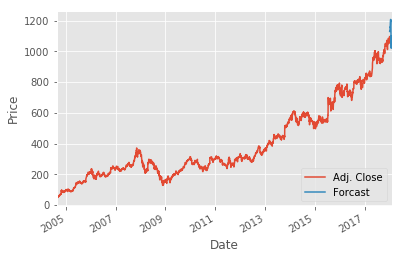

In [58]:
df['Adj. Close'].plot()
df['Forcast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()